## Texas Deathrow Inmate Data Analysis

In [138]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pyodbc

def mssql_connection(password: str, username: str, default_db: str = "master"):
                     server = "localhost"
                     
                     cnxn = pyodbc.connect(
                         "DRIVER={ODBC Driver 17 for SQL Server};SERVER="
                         + server
                         + ";DATABASE="
                         + default_db
                         + ";UID="
                         + username
                         + ";PWD="
                         +password
                     )
                     return cnxn

In [139]:
conn = mssql_connection(password= "CCny23912093" , username= "SarahMcKoy93" , default_db="summer_2022")

In [140]:
df = pd.read_sql("SELECT DATEDIFF(year,Date_of_Birth,Date_of_Offence) AS Age_of_Offence, Highest_Education_Level, Age_at_Execution, Height, Weight, Race, Native_County, Native_State FROM tx_deathrow_inmate" ,conn)

In [153]:
inmate_df = df.drop_duplicates()

According to the Death Penalty Information Center, the state of Texas has the second highest state execution rates percapita, as well as the second highest number of executions per death sentence in the country. Although the death penalty is a controversial topic, I think that it can be agreed upon that having to take someone's life is a tradgedy, and that we should find ways to reduce the number of people put on death row. Below, we can see how many executions occur in the state of Texas per year. 

[Text(0.5, 1.0, 'Number of Executions Per Year')]

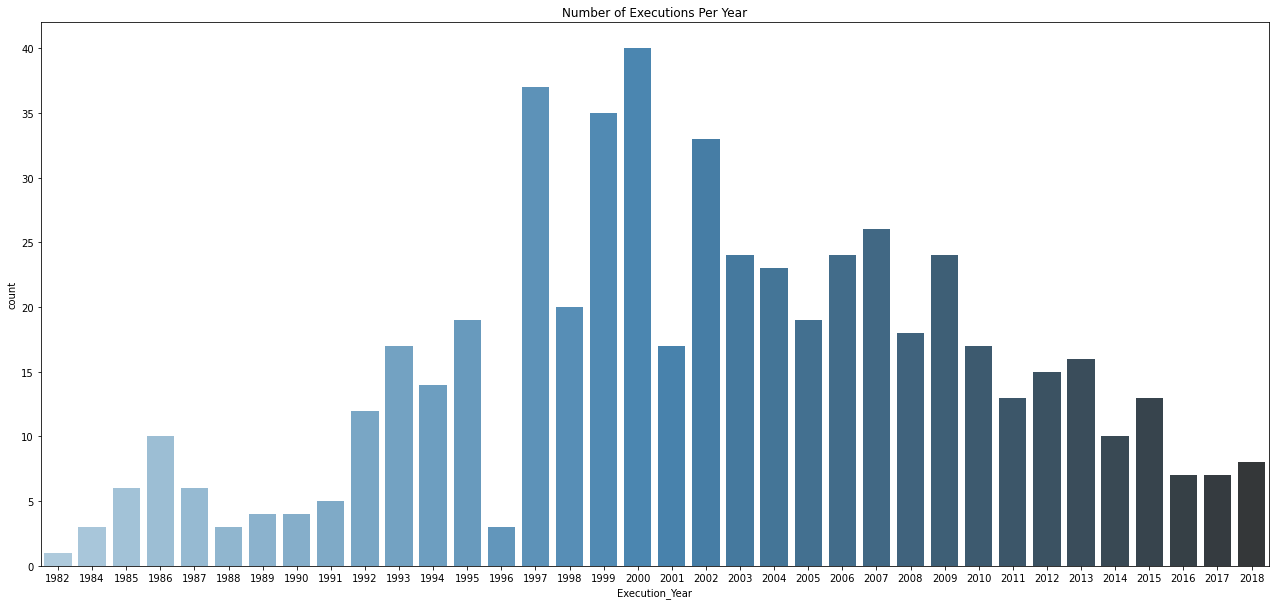

In [154]:
number_of_executions_df = pd.read_sql("SELECT YEAR(Execution_Date) AS Execution_Year FROM tx_deathrow_inmate",conn)
plt.figure(figsize = (22,10))
sns.countplot(x=number_of_executions_df["Execution_Year"], palette="Blues_d").set(title='Number of Executions Per Year')

Something interesting to note is that Texas had a steep decline in executions from 1995 to 1996. This was becuase in 1996, Texas had put a halt to executions due to the fact that execution laws were being put under federal review, regarding the constitutionality of having such an extensive appeal process for execution orders. This federal review led to the Antiterrorism and Effective Death Penalty Act of 1996, which limited an inmate's rights for habeas corpus appeals, meaning that it would be harder for cases to get federal review. That also meant it was easier for states to proceed with execution orders. As a result, there was an increase in executions from 1997-2002. 

From 2002 on, there's a steady decline in the number of executions per year. This is better explained in the next chart. 

posx and posy should be finite values
posx and posy should be finite values


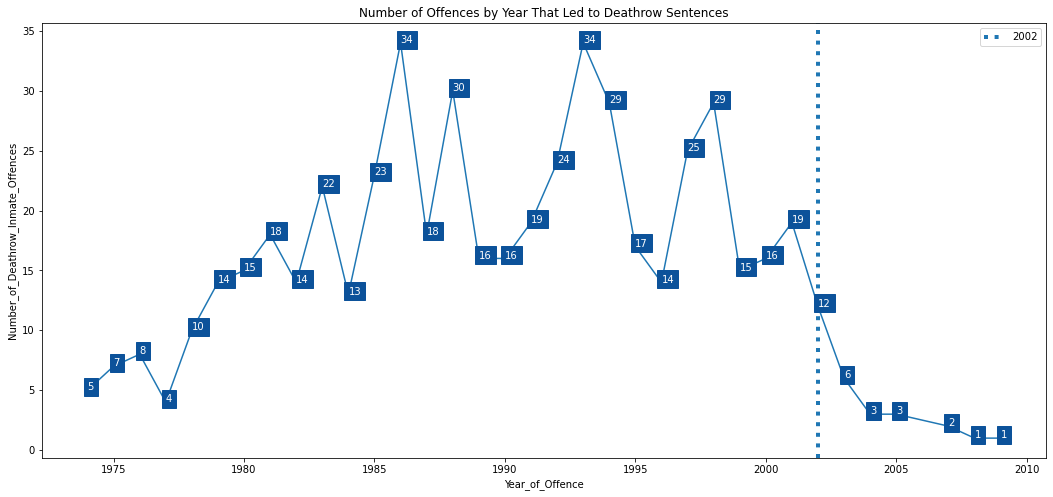

In [155]:
number_of_deathrow_offenders_df = pd.read_sql("SELECT YEAR(Date_of_Offence) AS Year_of_Offence, COUNT(*) AS Number_of_Deathrow_Inmate_Offences FROM tx_deathrow_inmate GROUP BY YEAR(Date_of_Offence)",conn)
plt.figure(figsize = (18,8))
plt.axvline(x=2002, label='2002', ls=':', lw=4)
ax = sns.lineplot(x=number_of_deathrow_offenders_df["Year_of_Offence"], y=number_of_deathrow_offenders_df["Number_of_Deathrow_Inmate_Offences"]).set(title='Number of Offences by Year That Led to Deathrow Sentences')
for x, y in zip(number_of_deathrow_offenders_df["Year_of_Offence"], number_of_deathrow_offenders_df["Number_of_Deathrow_Inmate_Offences"]):
 plt.text(x = x, y = y, s = '{:.0f}'.format(y),color='white').set_backgroundcolor('#0C529A')

In 2002, the Supreme Court's decision in Atkins v. Virginia made it unconstitutional under the Eight Amendment to execute defendants with intellectual disabilities. In this chart, the number of offences leading to deathrow sentences had declined after 2002, meaning that the intellectually disabled made up a good chunk of those on deathrow. What this tells us is that we should be more conscious of the mental state that defendants are in before being sentenced to death. 

<AxesSubplot:xlabel='Age_of_Offence'>

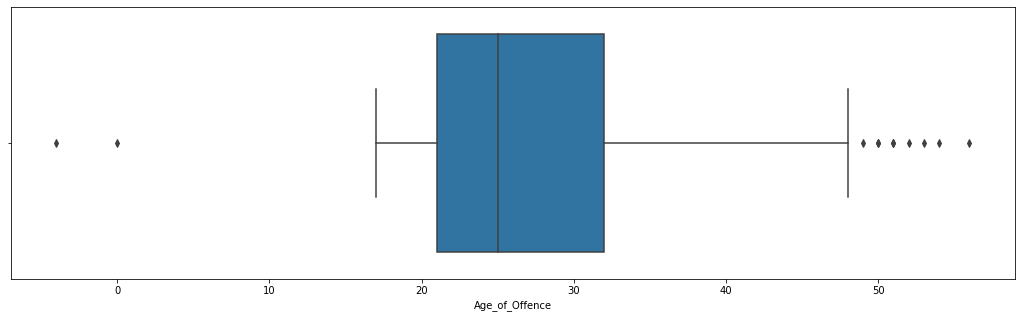

In [171]:
plt.figure(figsize = (18,5))
sns.boxplot(x=inmate_df["Age_of_Offence"])

Lastly, the majority of those commiting deathrow-worthy offenses are between the ages of 21 and 32. The box plot shows that the median age of those commiting deathrow-worthy offenses is 25, with the right skew showing that most committing offences are under the age of 25. Research shows that the prefrontal cortex doesn't fully develop until the age of 25. The current minimum age for the death penalty sentence is 18, although it is in discussion that this number should be raised. Seeing as the legal age for drinking and smoking is 21, and the legal age to rent a car is 25, it is unreasonalble that someone could be charged with the death sentence at a younger age. Given the research, the age should be raised to 25. If this is done, the number of people on deathrow would decrease by 44%. 

### Sources:

https://deathpenaltyinfo.org/stories/state-execution-rates

https://deathpenaltyinfo.org/facts-and-research/dpic-reports/dpic-year-end-reports/the-death-penalty-in-1996-year-end-report

https://deathpenaltyinfo.org/policy-issues/juveniles

https://documents.deathpenaltyinfo.org/pdf/FactSheet.pdf

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3621648/#:~:text=The%20development%20and%20maturation%20of%20the%20prefrontal%20cortex%20occurs%20primarily,helps%20accomplish%20executive%20brain%20functions.